### Read and View Data

In [1]:
import pandas as pd

In [2]:
price_df = pd.read_csv("UNI.csv")

In [3]:
price_df.sample(10)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
758,759,614542,769732,2,113210,3,3,14,191,104,92,239815.5
22,23,630883,744258,6,94437,5,9,15,176,84,126,337327.0
756,757,633837,776469,2,64662,1,3,14,135,72,125,446875.0
610,611,520571,709408,3,81850,5,10,15,144,109,132,339335.5
596,597,585069,872644,6,104912,2,1,11,176,70,137,305589.0
104,105,500265,753148,7,52701,5,7,9,184,108,84,417693.5
139,140,638946,793215,7,148642,5,1,8,158,66,88,114860.0
747,748,611487,716452,2,90604,3,3,10,198,50,114,302011.5
92,93,535574,740396,7,64457,5,7,13,159,77,76,381960.0
257,258,500921,792216,6,56937,5,9,14,185,64,117,446300.5


In [4]:
# Drop id as it's irrelevant to the price
price_df = price_df.drop('v.id', axis = 1)

### Explore data

In [5]:
#get size of feature set
price_df.shape

(1000, 11)

In [6]:
price_df.describe()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


In [7]:
#check for categorical variables
price_df.dtypes

on road old        int64
on road now        int64
years              int64
km                 int64
rating             int64
condition          int64
economy            int64
top speed          int64
hp                 int64
torque             int64
current price    float64
dtype: object

In [8]:
#check for null values
price_df.isnull().values.any()

False

In [9]:
#find correlation
corr = price_df.corr()

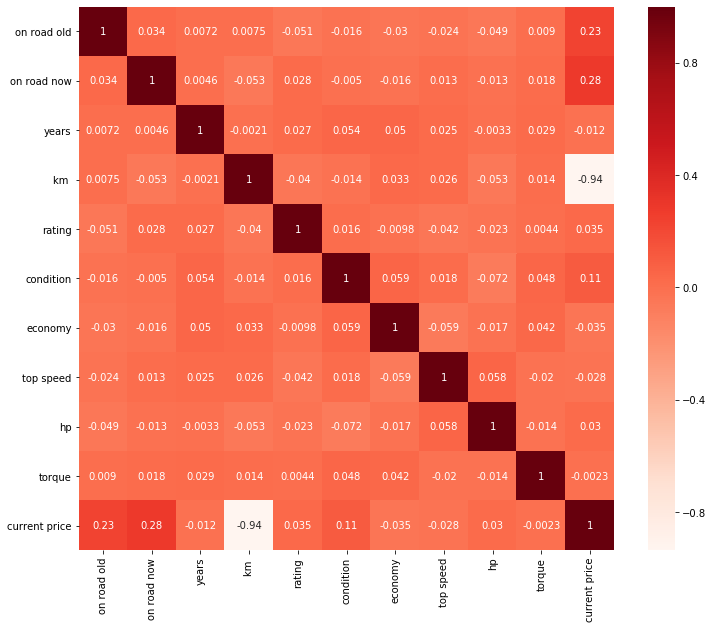

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

### Data Preprocessing

In [15]:
#Separating the data into target and features
X = price_df.drop('current price', axis=1)
Y = price_df['current price']

In [14]:
#Scaling the data
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X.values)
X = pd.DataFrame(X)

In [16]:
#Splitting the features into train and test
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(900, 10)
(900,)
(100, 10)
(100,)


### Define Model

In [18]:
import torch
import torch.nn as nn
from torch.nn import functional as F

#### convert numpy arrays to tensor

In [19]:
Xtrain_ = torch.tensor(x_train.values).float()
Xtest_ = torch.tensor(x_test.values).float()

In [17]:
Ytrain_ = torch.from_numpy(y_train.values).float().view(1,-1)[0]
Ytest_ = torch.from_numpy(y_test.values).float().view(1,-1)[0]

In [18]:
Xtrain_.shape, Ytrain_.shape

(torch.Size([900, 10]), torch.Size([900]))

In [19]:
Xtest_.shape, Ytest_.shape

(torch.Size([100, 10]), torch.Size([100]))

In [20]:
inputsize = 10
outputsize = 1
hiddensize = 100
num_epochs = 2000

In [21]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.fc1 = nn.Linear(inputsize, hiddensize)
        self.fc2 = nn.Linear(hiddensize, hiddensize)
        self.fc3 = nn.Linear(hiddensize, outputsize)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        out = self.fc3(x)
        
        return out.view(1,-1)[0]

In [22]:
model = LinearRegression()

In [23]:
import torch.optim as optim

loss_fn = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr = 0.01) 

### Train the model

In [24]:
for epoch in range(num_epochs):
    
    y_pred = model(Xtrain_) 
    loss = loss_fn(y_pred, Ytrain_) 
    
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step()
    
    if (epoch+1) % 500 == 0:
        print('Epoch[{}/{}], loss: {:.2f}'
              .format(epoch+1, num_epochs, loss.item()))

Epoch[500/2000], loss: 11500489728.00
Epoch[1000/2000], loss: 1267648512.00
Epoch[1500/2000], loss: 104083688.00
Epoch[2000/2000], loss: 73377208.00


### Evaluate Model

In [25]:
model.eval()

LinearRegression(
  (fc1): Linear(in_features=10, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=1, bias=True)
)

In [26]:
predict = model(Xtest_)
predict = predict.data.numpy()

In [27]:
data = {'original':y_test,'predicted':predict}
result_df = pd.DataFrame(data)

In [28]:
from sklearn.metrics import r2_score

r2=r2_score(predict, y_test)

In [29]:
r2

0.9927311831868225

### Generating Predictions

In [30]:
df = pd.read_csv("unitest_1.csv")

In [31]:
test_df = df.drop('v.id',axis=1)

In [32]:
min_max_scaler = preprocessing.MinMaxScaler()
test = min_max_scaler.fit_transform(test_df.values)
test_df = pd.DataFrame(test)

In [33]:
test_tensor = torch.tensor(test_df.values).float()

In [34]:
predicted_values = model(test_tensor)

In [37]:
data = {'v.id':df['v.id'],'current price':predicted_values.data.numpy()}
result_df = pd.DataFrame(data)

In [38]:
result_df.to_csv('Submission.csv',index=False)